In [26]:
import igraph as ig
import utils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = ig.Graph.Read('../../data/graphs/april2022.graphml')

In [3]:
VISUAL_STYLE = {
    'layout': utils.layout_geo(g),
    'bbox': (0, 0, 1000, 1000) 
}

In [4]:
g.to_undirected()
partition_louvain = g.community_multilevel()
partition_eigen = g.community_leading_eigenvector()

In [5]:
def has_node(graph, name):
    try:
        graph.vs.find(label=name)
    except:
        return False
    return True

In [6]:
for i in range(len(partition_louvain)):
    if has_node(partition_louvain.subgraph(i), "MILANO CENTRALE"):
        sub_louvain = partition_louvain.subgraph(i)

for i in range(len(partition_eigen)):
    if has_node(partition_eigen.subgraph(i), "MILANO CENTRALE"):
        sub_eigen = partition_eigen.subgraph(i)

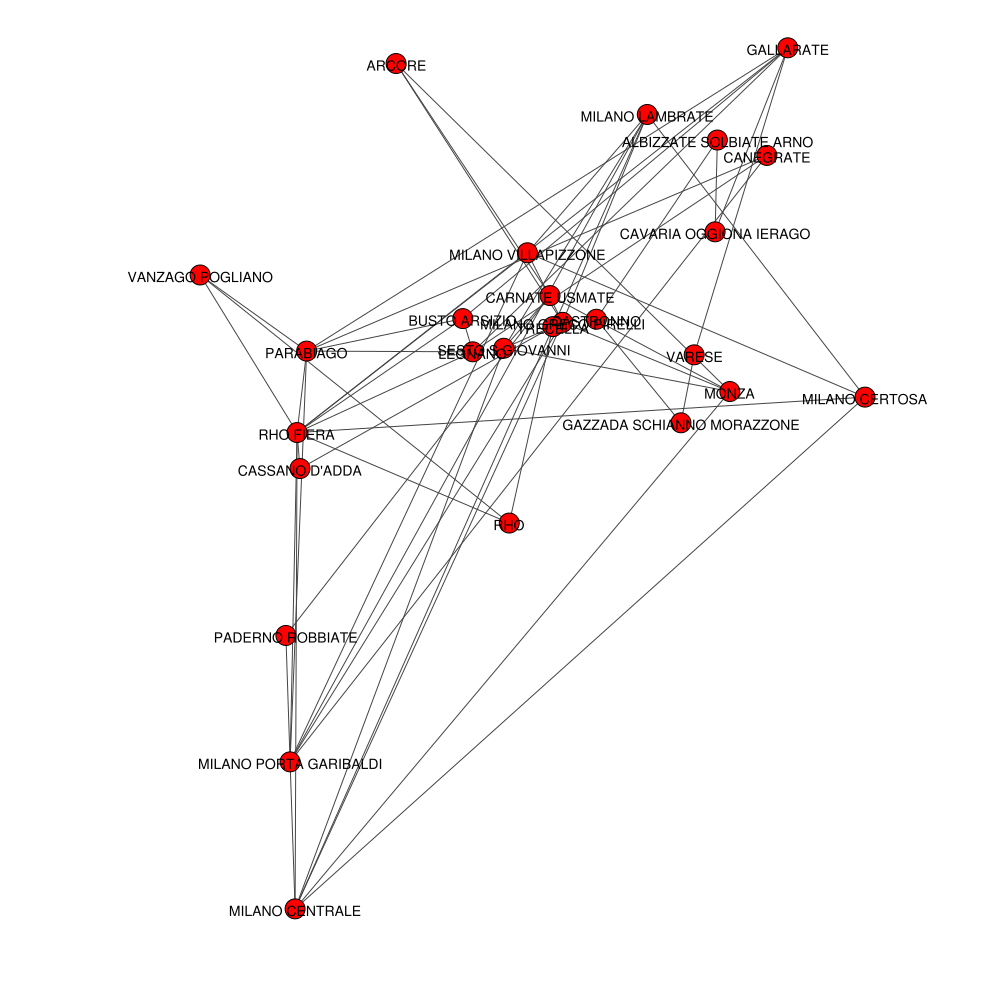

In [7]:
ig.plot(sub_louvain,**VISUAL_STYLE)


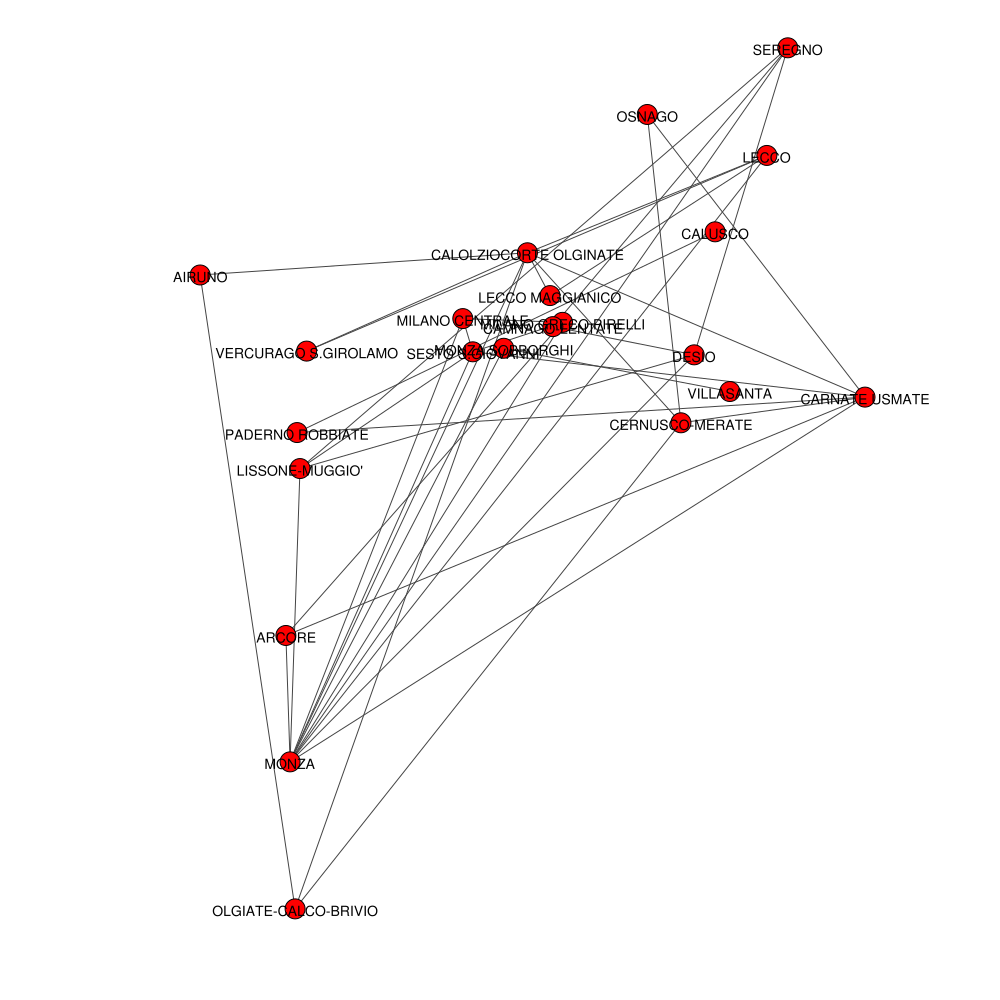

In [8]:
ig.plot(sub_eigen,**VISUAL_STYLE)

In [17]:
eigen_v = []
louvain_v = []
for i in range(len(sub_eigen.vs)):
    eigen_v.append(sub_eigen.vs[i]['label'])

for i in range(len(sub_louvain.vs)):
    louvain_v.append(sub_louvain.vs[i]['label'])


['VERCURAGO S.GIROLAMO',
 'MILANO GRECO PIRELLI',
 'CAMNAGO-LENTATE',
 "LISSONE-MUGGIO'",
 'CALUSCO',
 'CERNUSCO-MERATE',
 'LECCO',
 'VILLASANTA',
 'MONZA',
 'SEREGNO',
 'AIRUNO',
 'OSNAGO',
 'CALOLZIOCORTE OLGINATE',
 'DESIO',
 'MILANO CENTRALE',
 'CARNATE USMATE',
 'PADERNO ROBBIATE',
 'SESTO S.GIOVANNI',
 'OLGIATE-CALCO-BRIVIO',
 'LECCO MAGGIANICO',
 'ARCORE',
 'MONZA SOBBORGHI']

In [37]:
intersection = list(set(eigen_v).intersection(louvain_v))
trim_eigen_v = [v for v in eigen_v if v not in intersection]
trim_louvain_v = [v for v in louvain_v if v not in intersection]
intersection

['ARCORE',
 'PADERNO ROBBIATE',
 'MONZA',
 'CARNATE USMATE',
 'SESTO S.GIOVANNI',
 'MILANO CENTRALE',
 'MILANO GRECO PIRELLI']

In [24]:
for i in range(len(sub_eigen.vs)):
    if sub_eigen.vs[i]['label'] in intersection:
        sub_eigen.vs[i]['color'] = 'red'
    else:
        sub_eigen.vs[i]['color'] = 'blue'

for i in range(len(sub_louvain.vs)):
    if sub_louvain.vs[i]['label'] in intersection:
        sub_louvain.vs[i]['color'] = 'red'
    else:
        sub_louvain.vs[i]['color'] = 'blue'

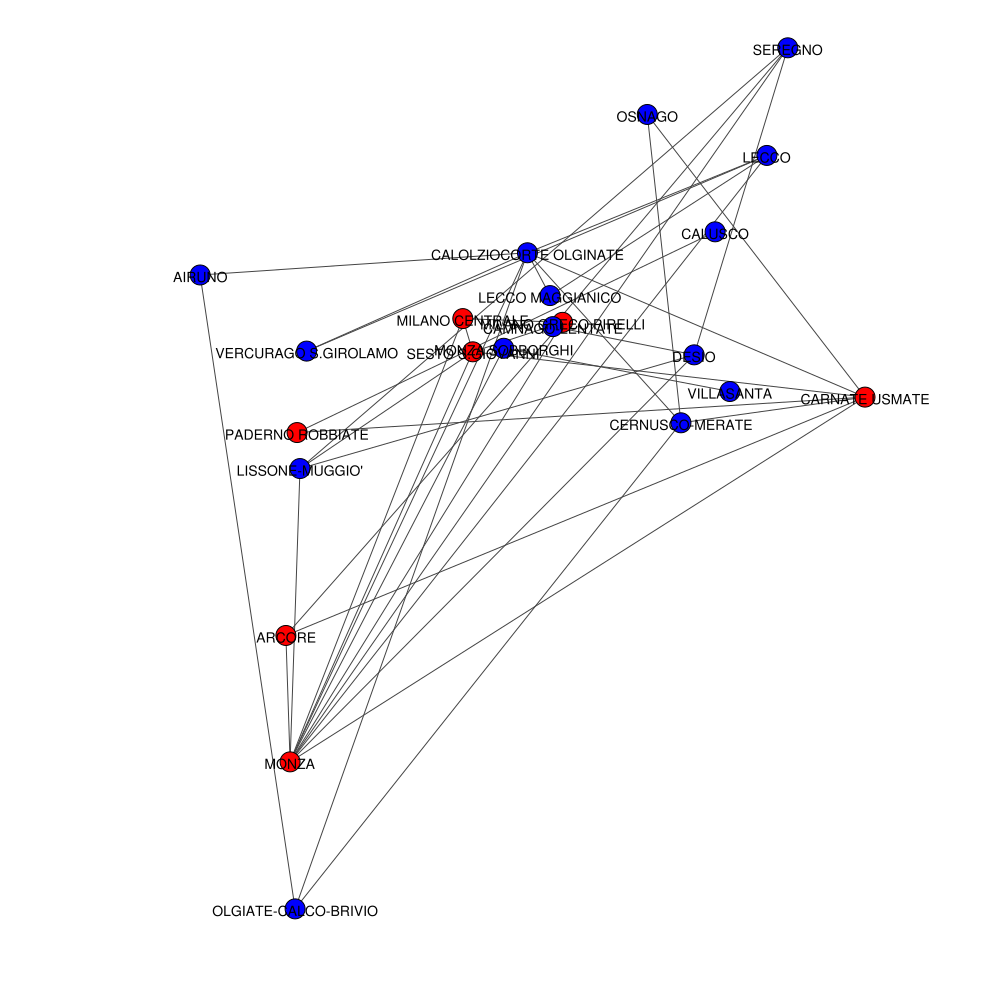

In [34]:
ig.plot(sub_louvain, **VISUAL_STYLE)

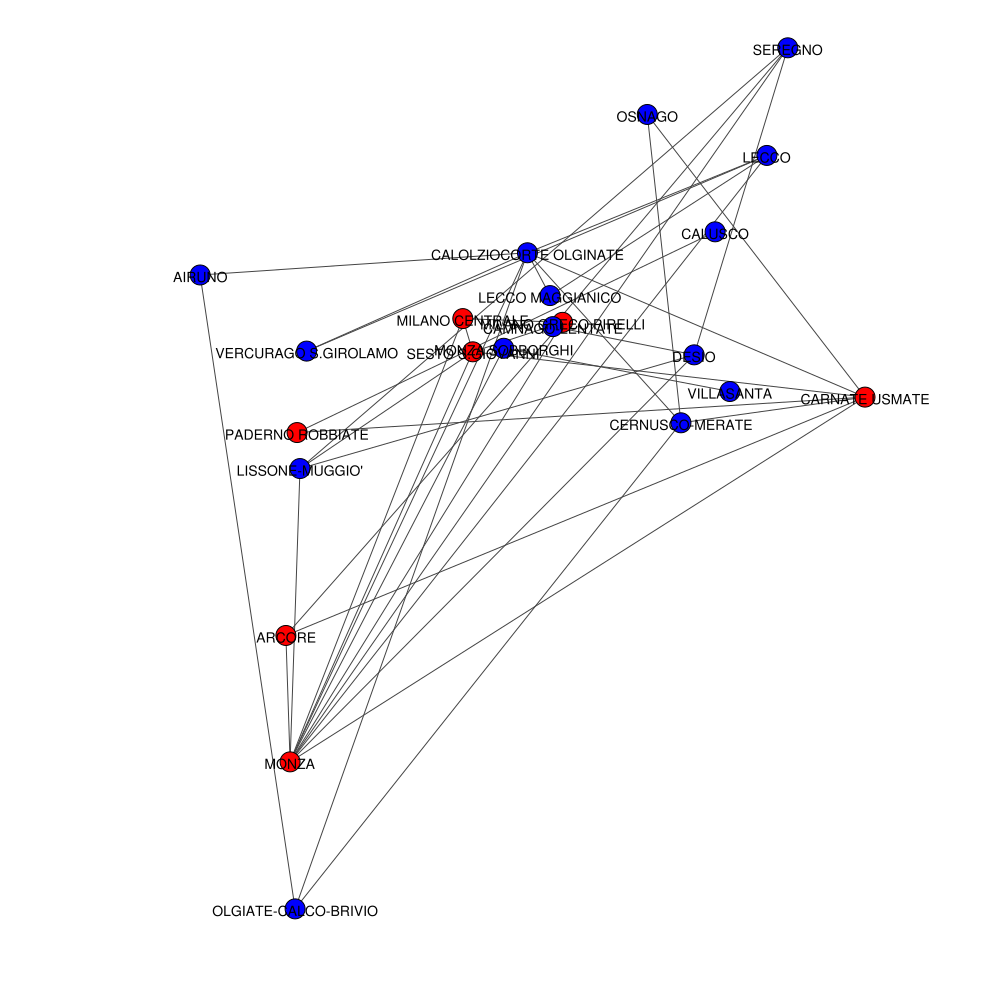

In [35]:
ig.plot(sub_eigen, **VISUAL_STYLE)